In [1]:
import warnings 

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)


Coefficients from sklearn: 
 [[1.95734706]]

Intercept from sklearn: 
 [0.50048278]

Coefficients from gradient descent algorithm: 
 1.9563085011781525

Intercept from gradient descent algorithm: 
 0.5007066675820556


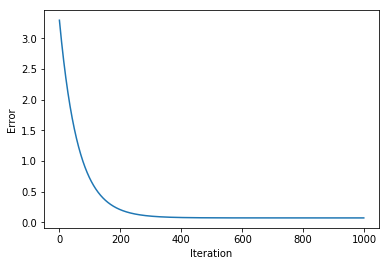

In [2]:
def LR_cost_function (alpha, beta, x, y):
    '''Return the cost for a given line and data.
    
    Alpha and beta are the coefficients that describe the fit line line, while
    x and y are lists or arrays with the x and y values of each data point.
    '''
    error = 0
    n = len(x)
    for i in range(n):
        point_error = (y[i] - (alpha + beta * x[i])) ** 2
        error += point_error
    return error / n
# Function we will call each iteration of the gradient descent
def step(alpha_cur, beta_cur, learning_rate, x, y):
    '''Move downhill from a current cost function to a new, more optimal one.'''
    alpha = 0
    beta = 0
    n = len(x)
    for i in range(n):
        point_alpha = -(2/n) * (y[i] - ((alpha_cur + beta_cur * x[i])))
        alpha += point_alpha
        
        # partial derivative of the slope
        point_beta = -(2/n) * x[i] * (y[i] - ((alpha_cur + beta_cur * x[i])))
        beta += point_beta
        
    new_alpha = alpha_cur - learning_rate * alpha
    new_beta = beta_cur - learning_rate * beta
    return[new_alpha, new_beta]
# 1000 decision points, moving .005 with each step
stop = 1000
learning_rate = .005

# set start point
alpha_start = 0
beta_start = 0

# time for data!
x = np.random.normal(0, 1, 100)
y = x * 2 + np.random.sample(100)

# Fit an true minimum regression using solved equations.
regr = linear_model.LinearRegression()
regr.fit(x.reshape(-1, 1), y.reshape(-1, 1))

print('\nCoefficients from sklearn: \n', regr.coef_)
print('\nIntercept from sklearn: \n', regr.intercept_)


# Now fit an iteratively optimized regression using your custom gradient
# descent algorithm.

# Storing each iteration to inspect later.
all_error=[]

# Provide starting values.
alpha = alpha_start
beta = beta_start

# Run the algorithm
for iter in range(stop):
    
    # take the next step, assigning the results of our first step function to feed the next step.
    alpha, beta = step(alpha, beta, learning_rate, x, y)
    
    error = LR_cost_function(alpha, beta, x, y)
    
    # store error
    all_error.append(error)

print('\nCoefficients from gradient descent algorithm: \n', beta)
print('\nIntercept from gradient descent algorithm: \n', alpha)

plt.plot(all_error)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.show()
        